# Trabajo práctico 2: Descomposicion SVD.
## Alumnos:
- Juan Pablo Daus Meier
- Vladimir Kannemann

In [87]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

## Manipulación de datos utilizados. 

In [3]:
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')
#pasamos los Dataframe a matrices, asi trabajamos siempre con matrices
test = test.to_numpy()
train = train.to_numpy()
#obtenemos las submatrices que nos interesan para realizar los testeos, entrenamientos, etc. 
primeros200=test[0:200]
primeros2000=train[0:2000]


# Punto 1: 
### Inciso A:

In [4]:
#se encarga de agarrar una de las filas de cualquiera de los 2 
# sets de datos y graficar el numero al que pertenece.
def graf_imagen(A):
    semiImagen = np.reshape(A,(28,28))
    plt.imshow(semiImagen,cmap='Greys')
    

### Inciso B

In [5]:
#tenemos que ver cuantas imagenes tenemos por digito.

def contador(c,i):
    return sum(c==i)

def cantidadPorDigito(B):
    primeraCol=B[:,0] #guardamos nombre de la primera columna
    conteo = {}
    for i in range(10):
        conteo[i]=contador(primeraCol,i)
    return conteo

In [6]:
print('Veamos cuantas imagenes hay por digito:\n')

def print_diccionario(diccionario):
    headers = ['Digito', 'Cantidad']
    filas = [[clave, valor] for clave, valor in diccionario.items()]
    print(tabulate(filas, headers=headers, tablefmt='grid'))

print('Conjunto entrenamiento:\n') 
print_diccionario(cantidadPorDigito(train))
print('\n')
print('Conjunto testeo:\n')
print_diccionario(cantidadPorDigito(test))

Veamos cuantas imagenes hay por digito:

Conjunto entrenamiento:

+----------+------------+
|   Digito |   Cantidad |
+==========+============+
|        0 |       5923 |
+----------+------------+
|        1 |       6742 |
+----------+------------+
|        2 |       5958 |
+----------+------------+
|        3 |       6131 |
+----------+------------+
|        4 |       5842 |
+----------+------------+
|        5 |       5420 |
+----------+------------+
|        6 |       5918 |
+----------+------------+
|        7 |       6265 |
+----------+------------+
|        8 |       5851 |
+----------+------------+
|        9 |       5949 |
+----------+------------+


Conjunto testeo:

+----------+------------+
|   Digito |   Cantidad |
+==========+============+
|        0 |        980 |
+----------+------------+
|        1 |       1135 |
+----------+------------+
|        2 |       1032 |
+----------+------------+
|        3 |       1010 |
+----------+------------+
|        4 |        982 |
+---

### Inciso C

In [7]:
#usamos una funcion que busque el primer elemento y que al final haga un 
#promedio para todos los elemen todos del vector resultante.

def sacarVecSum(M):
    v = M[0]
    cantDeFilas = M.shape[0]
    for i in range(1,cantDeFilas):
        v = v + M[i]
    return v

In [8]:
def imagenPromedio(C):
    newC = np.zeros((10,785))
    posiblesDigitos=newC.shape[0]
    cantDig = cantidadPorDigito(C)
    for i in range(posiblesDigitos):
        miniFiltro = C[C[:,0]==i]
        promedio= sacarVecSum(miniFiltro)/cantDig[i]
        newC[i]=promedio
    return newC

In [9]:
imagenPromedio(primeros200)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [7., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

### Inciso D

In [10]:
def graf_ImPromedio(C):
    imagenes_promeedios = imagenPromedio(C)
    for i in range(imagenes_promeedios.shape[0]):
        im = imagenes_promeedios[i]
        im1 = im[1:]
        graf_imagen(im1)
        plt.title('Digito: '+ str(im[0]))
        plt.show()

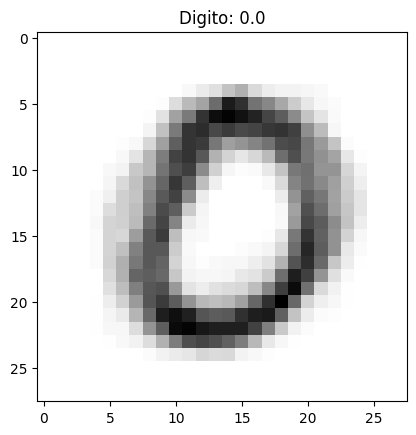

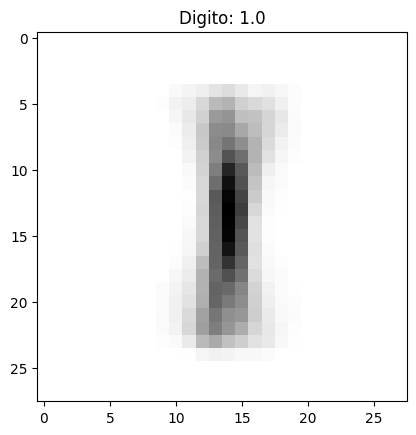

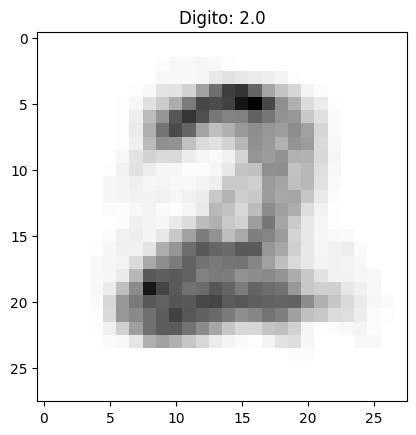

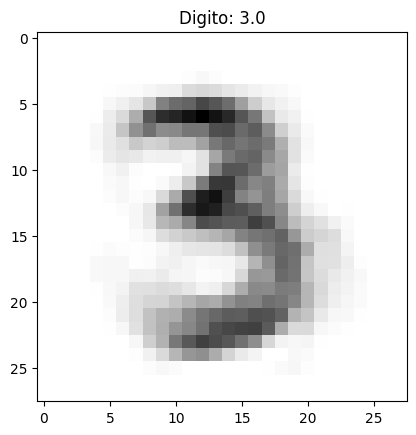

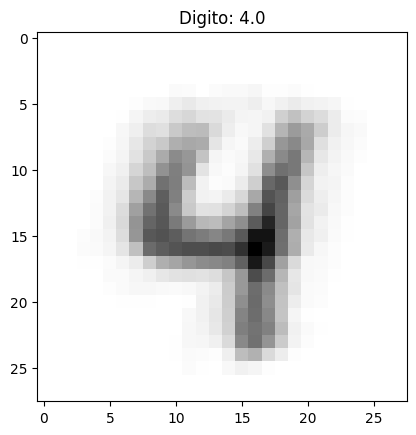

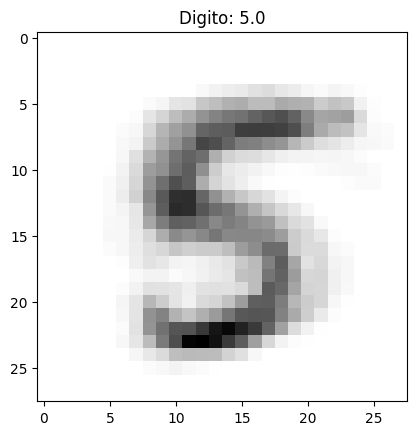

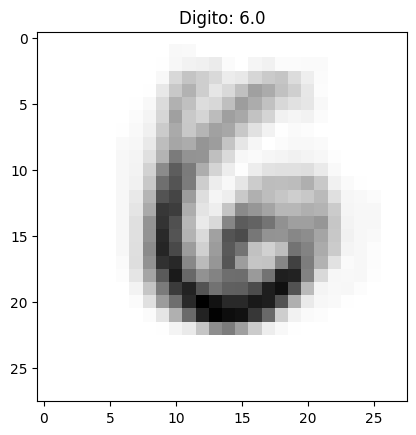

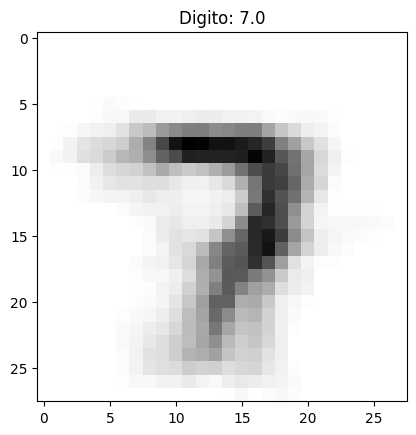

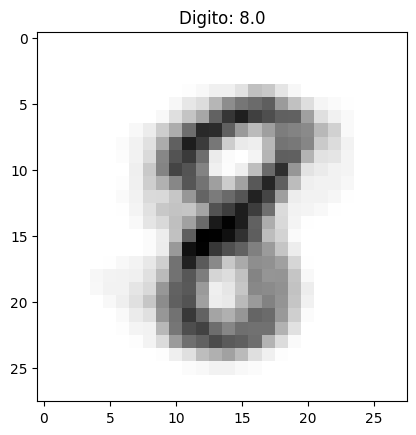

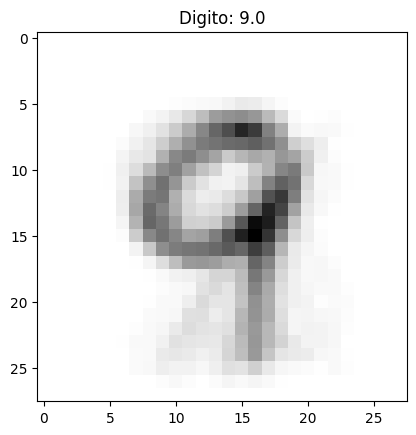

In [11]:
graf_ImPromedio(primeros200)

In [12]:
promedio=imagenPromedio(primeros2000)

## Punto 2:
### Inciso A

In [13]:
def prediccion(Ma200,prom):
    cant = Ma200[:,0].shape[0]
    arregloDePredicciones = np.zeros(cant) #definimos un vector de long de 200
    for i in range(cant):
        distancias = np.zeros(prom.shape[0])
        a = Ma200[i][1:] #i-esimo vector de la matriz 
        for j in range(len(distancias)):
            b = prom[j][1:] #j-esimo vector de las predicciones
            dist = np.linalg.norm(a-b) #sacamos norma 2/distanacia euclidea
            distancias[j]=dist 
        arregloDePredicciones[i] = np.argmin(distancias) #guardamos el valor del numero
    originales = Ma200[:,0]
    return arregloDePredicciones, originales

### Inciso B

In [14]:
def Precision(datos, prom):
    etiRs=datos[:,0] 
    predics=prediccion(datos,prom)[0]
    casosAciertos = sum(predics==etiRs) #buscamos la cantidad de etiquetas reales contra las predichas
    casosTotales = len(datos[:,0])
    precision = casosAciertos/casosTotales
    return precision
print(Precision(primeros200, promedio))


0.77


### Inciso C
#### Vamos a graficar los casos no acertados y ver con que nos encontramos. 

In [29]:
pred = prediccion(primeros200,promedio)

#se modifico el codigo para que se entreguen los pares predichos y digitos correctos, con sus respectivos graficos. 

def graf_noAcertados(A,pred):
    predichos=pred[0]    
    etR = pred[1]
    filtro = predichos!=etR #obtenemos un vector booleano, donde nos dice quienes no son acertados
    
    predichos = predichos[filtro]
    etR = etR[filtro]
    noAcertados = A[filtro] #obtenemos un vector booleano, donde nos dice quienes no son acertados
    
    for i in range(len(etR)):
        graf_imagen(noAcertados[i][1:])
        plt.title('Digito: '+ str(etR[i]) +'  Predicho: '+ str(predichos[i]))
        plt.show()

##### Viendo las imágenes originales son "identificables" los digitos, por lo que es curioso ver que no se haya acertado en la predicción, intentemos ver que pasa si queremos calcular la predicción.

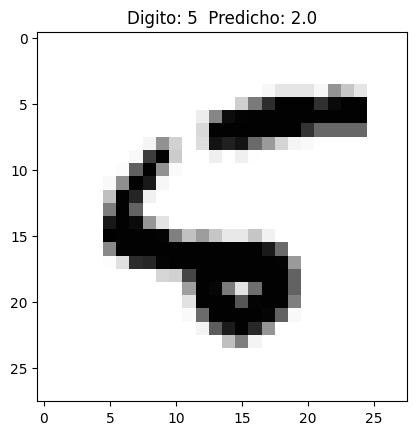

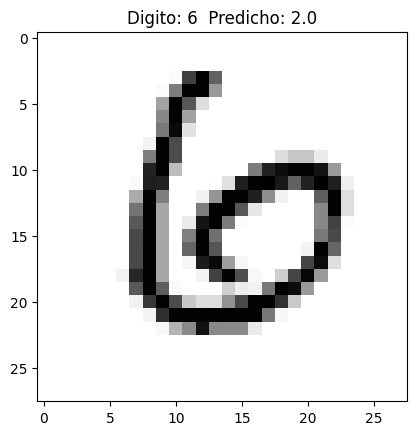

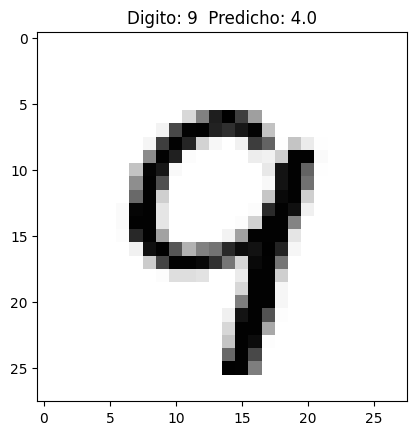

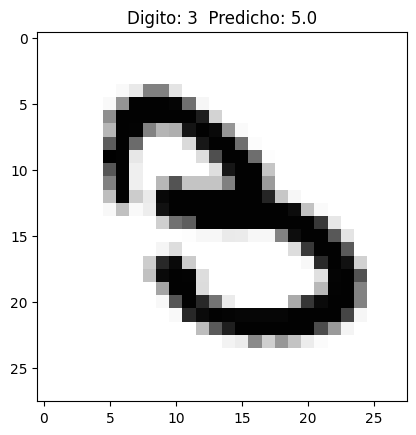

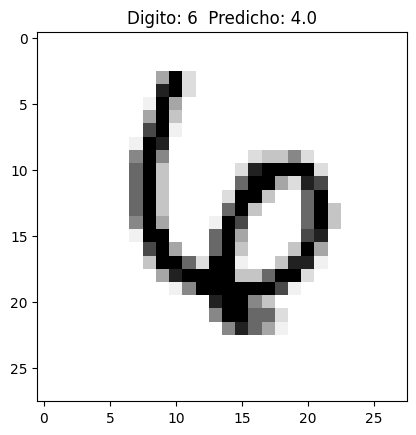

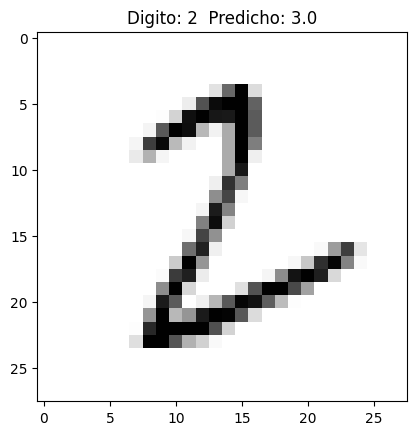

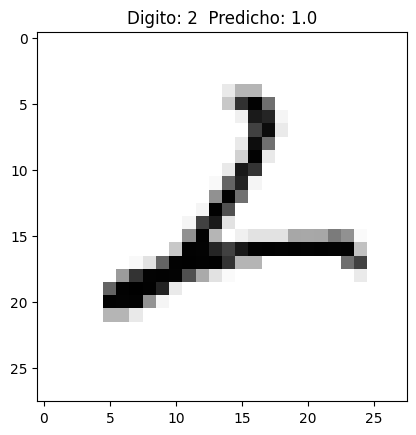

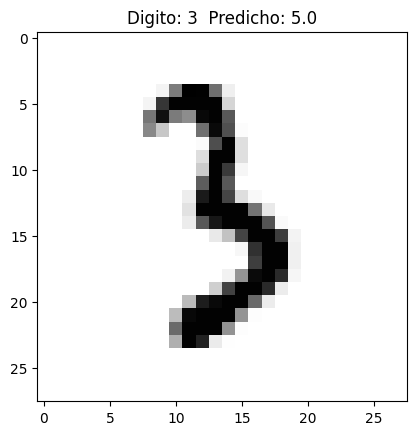

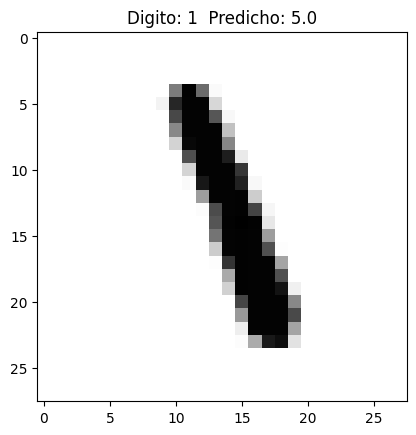

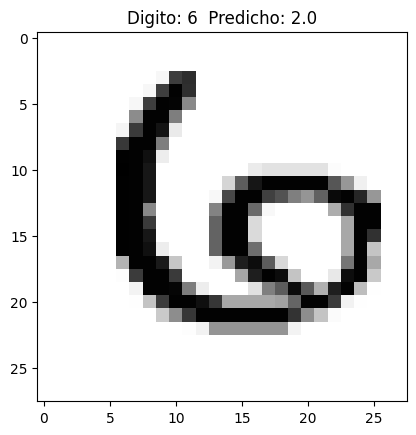

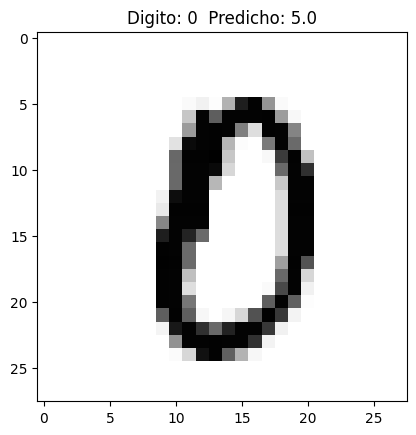

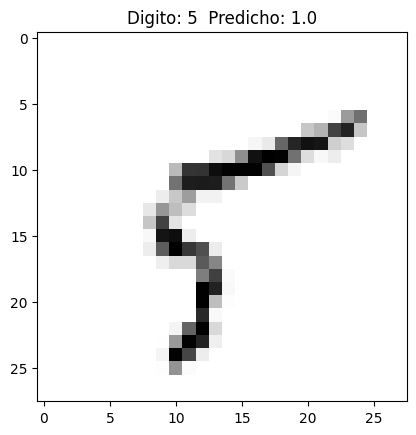

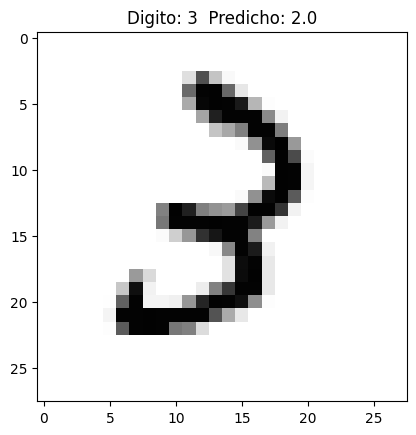

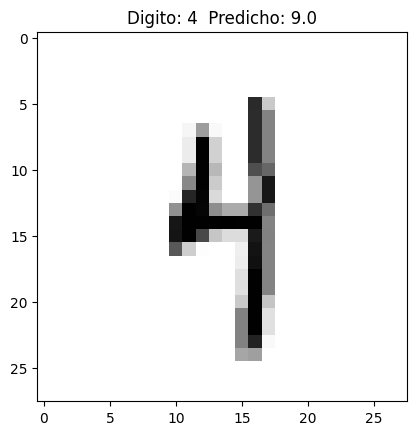

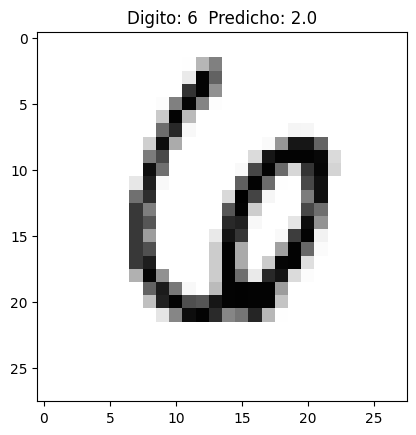

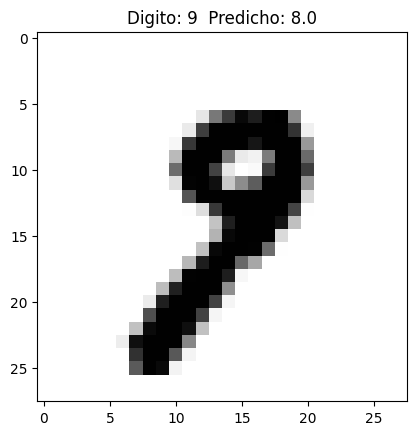

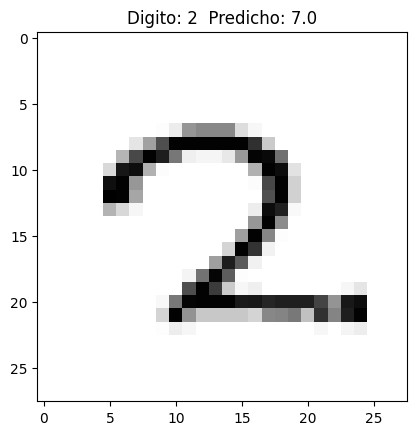

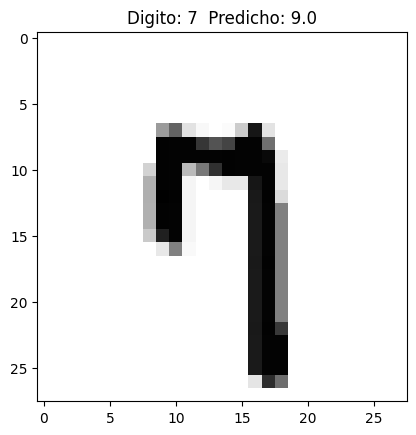

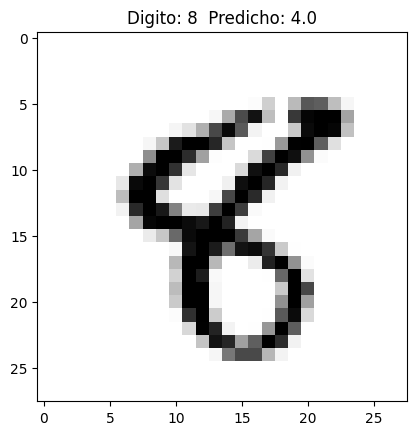

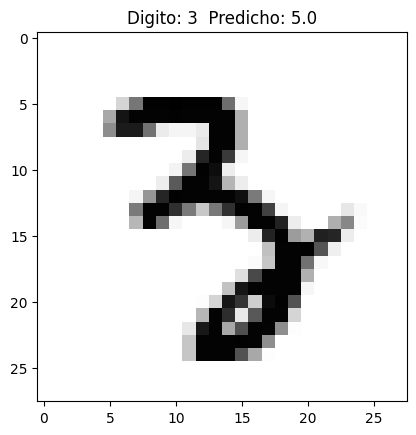

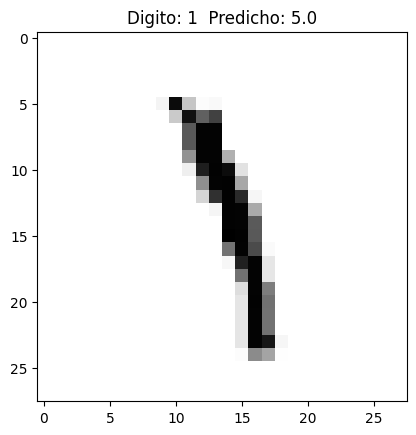

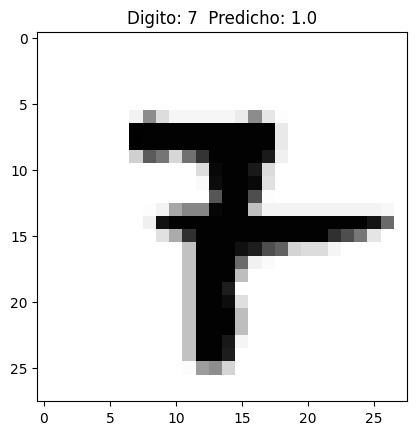

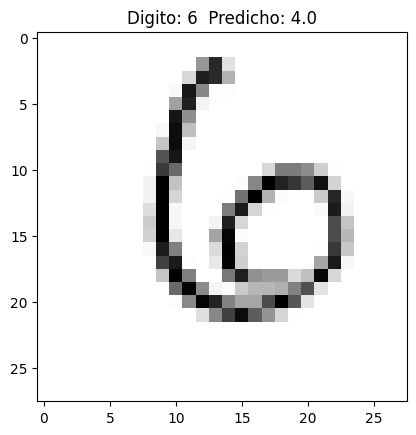

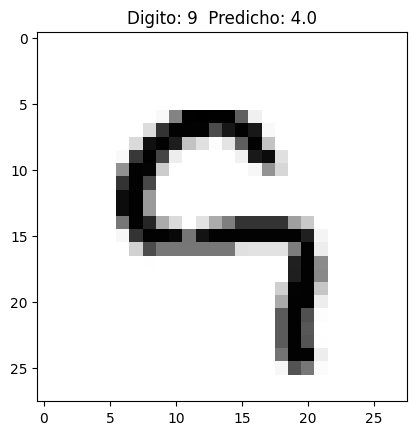

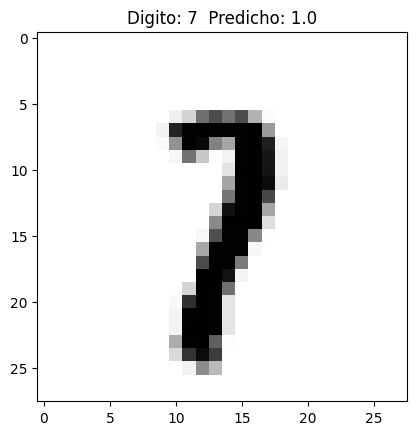

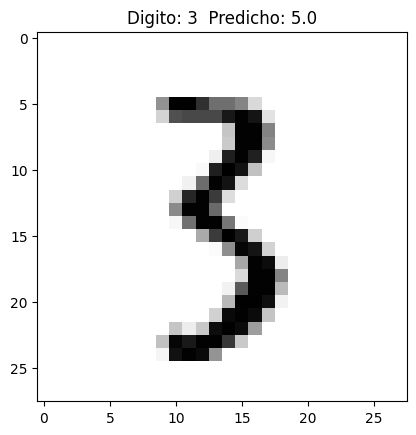

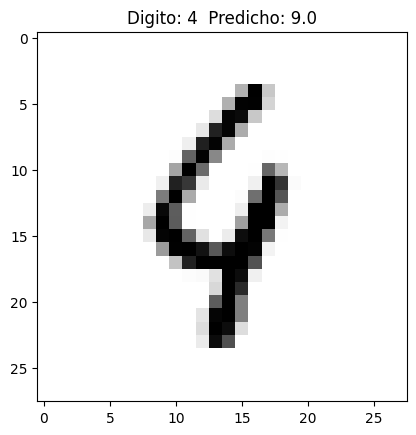

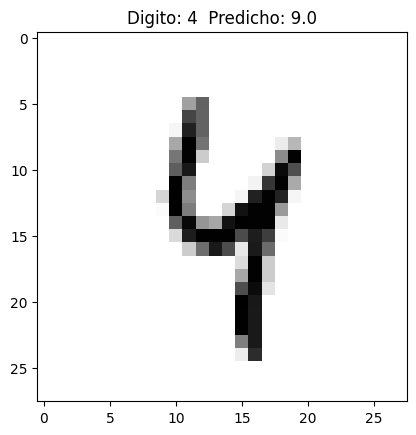

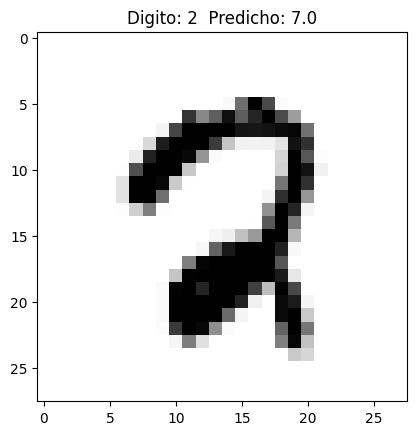

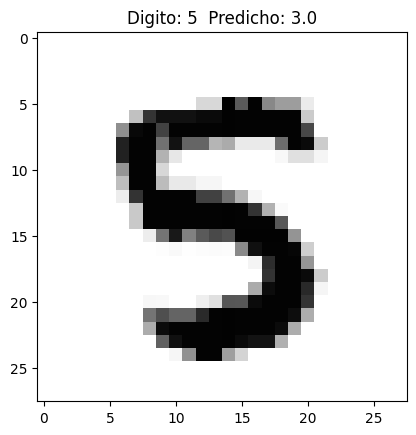

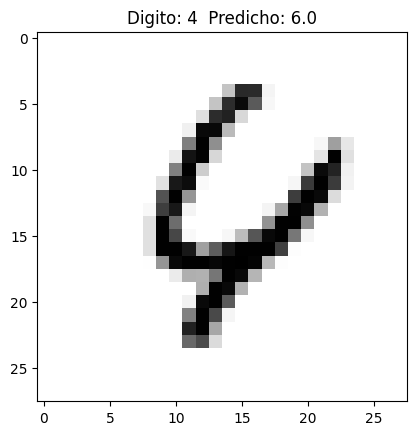

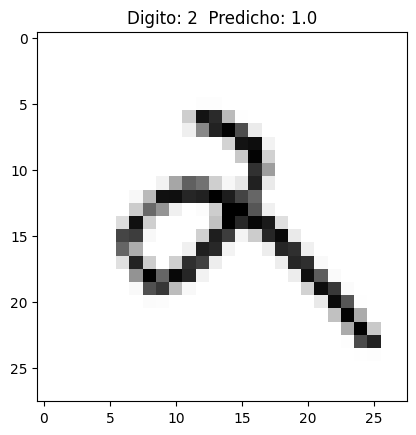

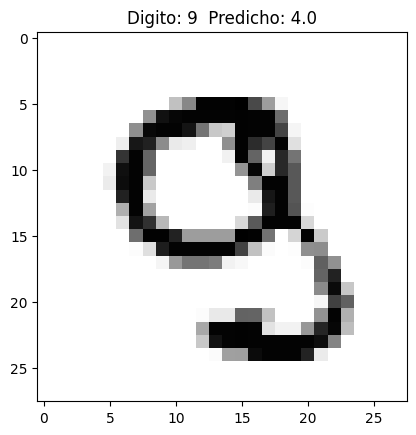

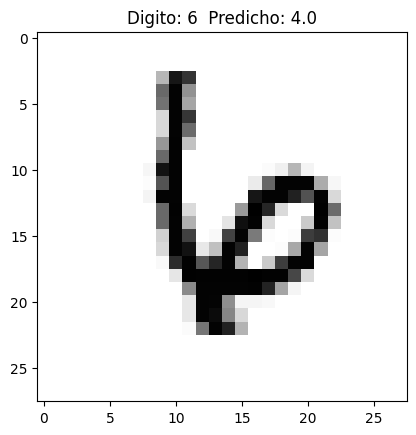

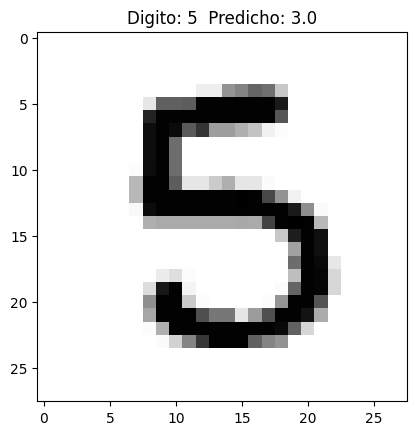

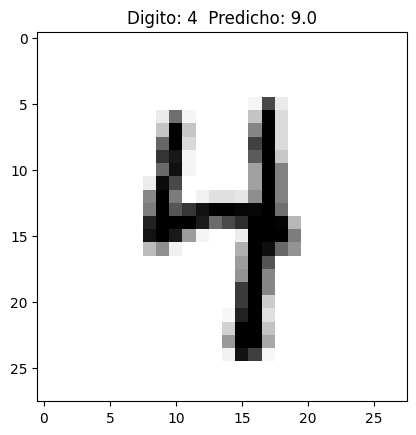

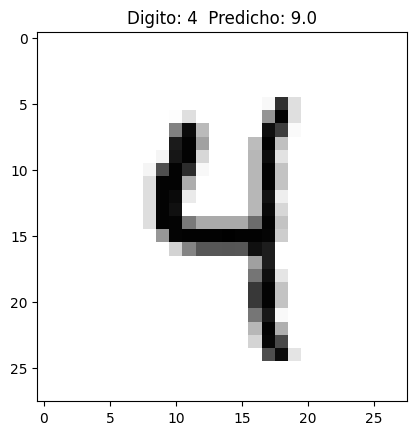

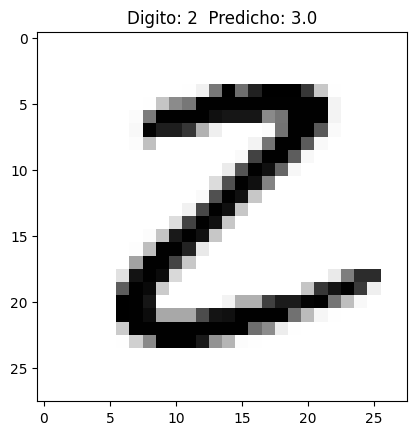

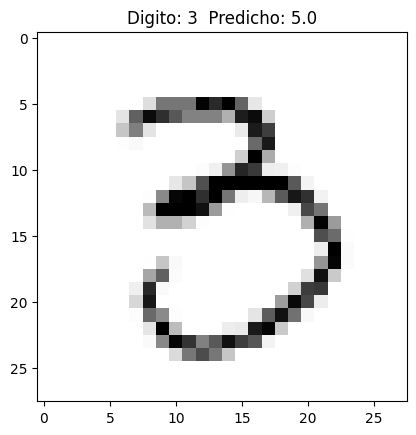

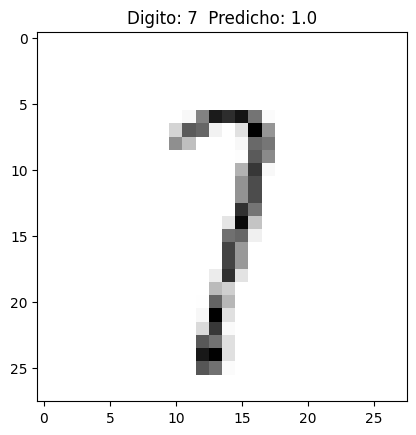

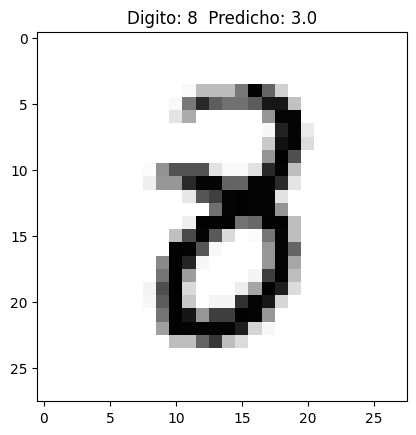

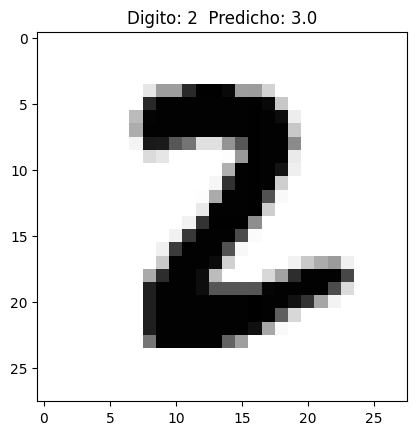

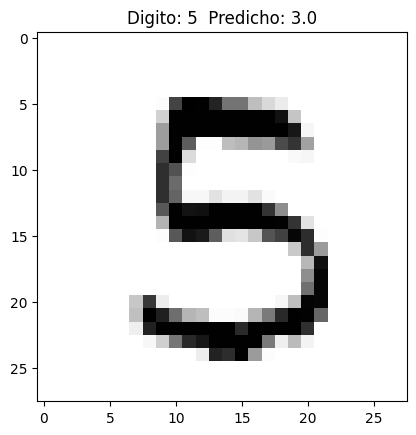

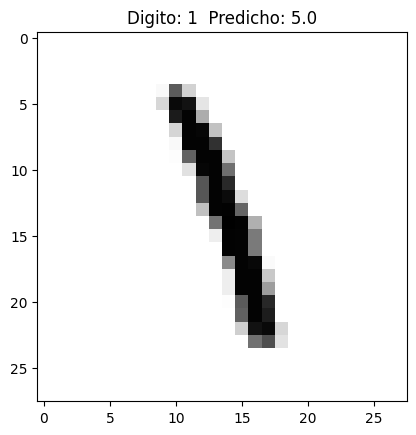

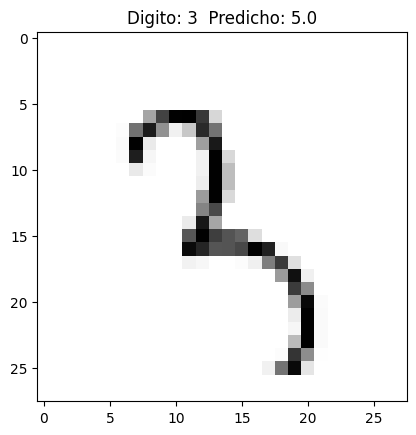

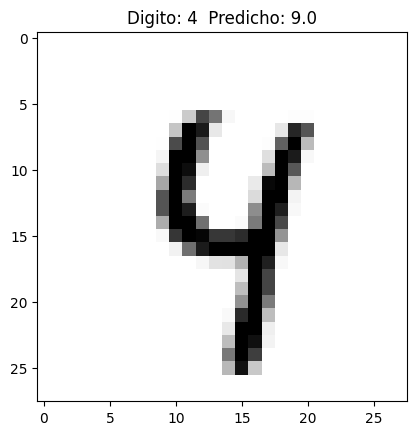

In [30]:
graf_noAcertados(primeros200,pred)

##### Lo que terminamos viendo es que los gráficos no son lo bastante 'fuerte' como para poder considerarse un solo número o sus predicciones no puede reconocer de una buena manera al dígito que pertenecen o incluso los datos están mal cargados. Por ejemplo hay uno de los gráficos que es un 9, pero tanto el dígito original como el predicho es un 0. 

##### En conclusión, teniendo en cuenta que la precisión es bastante buena (ya que está cerca de un 0.80) y lo observado en los casos que no se pudo precisar de manera correcta el dígito, el algoritmo es bueno, teniendo excepciones como lo puede ser el caso mencionado anteriormente. Por lo tanto no es tan buen algoritmo para casos en los que los dígitos ocupen lugares y tengan formas similares o también para cuando la información está mal cargada.


# Punto 3
### Ahora queremos calcular la descomposición SVD, a través del método de la potencia.

In [20]:
def metodoDeLaPotencia(A,v):
    B = np.transpose(A) @ A 
    vanterior=v
    vk = B@v
    vk =  vk / np.linalg.norm(vk)
    epsilon = np.finfo(float).eps
    parada = 1-epsilon  
    #ciclamos hasta tener el autovector que queremos
    while np.dot(vk,vanterior) < parada:
        vanterior = vk
        vk = B@vk
        vk = vk / np.linalg.norm(vk)
    return vk

In [21]:
def Descomp_SVD(A):
    Mat = A.copy()
    n = A.shape[0]
    m = A.shape[1]
    
    #buscamos el minimo entre las filas y las columnas (preguntar si es valido)
    minimo = min(n,m)
    
    #definimos U, Sigma y V con sus respectivas dimensiones
    U = np.zeros((minimo,n))
    V = np.zeros((m,minimo))
    Sigma = np.zeros((minimo,minimo))
    
    
    #buscamos el minimo entre las filas y las columnas (preguntar si es valido)
    minimo = min(n,m)
    
    for i in range(minimo):
        vrandom = np.random.randn(m)
        
        while (np.linalg.norm(vrandom)==0):
            vrandom = np.random.randn(m)
            
        vrandom = vrandom / np.linalg.norm(vrandom)
        v_ = np.array(metodoDeLaPotencia(Mat, vrandom))
        v = np.transpose(v_)
        sigma = np.linalg.norm(Mat@v)
        u = (Mat@v) / sigma
        
        #despues de calcular los v, u y sigma, los asignamos a sus respectivas matrices
        V[:,i] = v
        U[i] = np.transpose(u)
        Sigma[i,i] = sigma
        
        u = np.reshape(u,(len(u),1))
        v = np.reshape(v,(len(v),1))
        Mat = Mat - (sigma*(u@np.transpose(v))) #calculamos A'
    #transponemos U, ya que fuimos asignando los u en las filas y las queremos como columnas
    U = np.transpose(U)
    
    return U, Sigma, V

In [22]:
#funcion para imprimir las matrices
def Matrices(A):
    matrizU, matrizDelta, matrizV = Descomp_SVD(A)
    print("Matriz U:\n", matrizU)
    print("Matriz Delta:\n", matrizDelta)
    print("Matriz V:\n", matrizV)
    print("Matriz original:\n", matrizU @ matrizDelta @ matrizV.T)

In [23]:
A = np.array([[1,2],[3,4],[5,6]])
Matrices(A)


Matriz U:
 [[ 0.2298477  -0.88346102]
 [ 0.52474482 -0.24078249]
 [ 0.81964194  0.40189603]]
Matriz Delta:
 [[9.52551809 0.        ]
 [0.         0.51430058]]
Matriz V:
 [[ 0.61962948  0.78489445]
 [ 0.78489445 -0.61962948]]
Matriz original:
 [[1. 2.]
 [3. 4.]
 [5. 6.]]


## Punto 4
### Inciso A

In [24]:
def clasificacionDeMatrices(A):
    primeras2000A = A[0:2000]
    
    #ordenamos la matriz mirando la primera columna que es quien nos dice 
    #los digitos
    
    primeras2000A = primeras2000A[primeras2000A[:,0].argsort()]
    
    listaDeMatrices = []
    for i in range(0,10):
        submatriz = primeras2000A[primeras2000A[:,0]==i].T
        submatriz = submatriz[1:]
        listaDeMatrices.append(submatriz)

    return listaDeMatrices

### Inciso B

In [25]:
def descomposicionDeMatrices(lista):
    listaU = []
    listaDeltas = []
    listaV = []
    
    for i in range(len(lista)):
        descomposicion_i = Descomp_SVD(lista[i])
        U = descomposicion_i[0]
        listaU.append(U)
        
        Delta = descomposicion_i[1]
        listaDeltas.append(Delta)
        
        V = descomposicion_i[2]
        listaV.append(V)

    return listaU, listaDeltas, listaV


### Incisos C y D

In [26]:
def graf_col(lista,n):
    for i in range(len(lista)):
        col_n = lista[i][:,n-1]
        col_n = col_n.reshape((1,len(col_n)))
        graf_imagen(col_n)
        plt.title('Matriz U del digito:' + str(i) + '; columna: '+ str(n))
        plt.show()

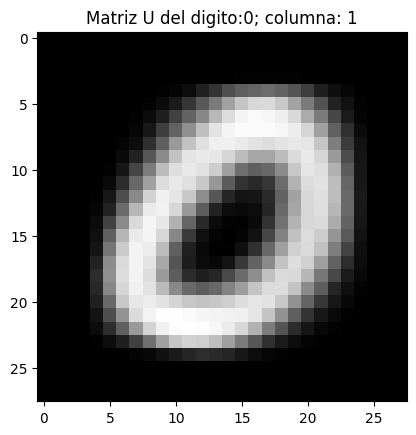

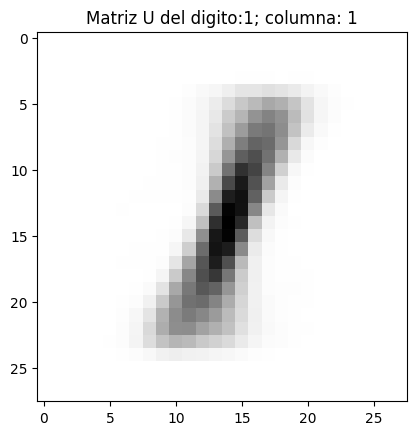

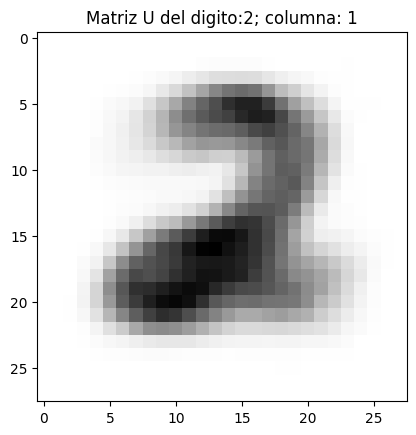

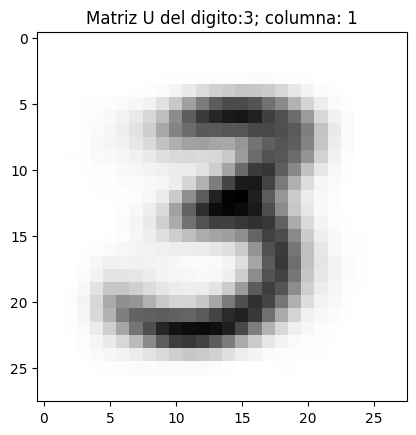

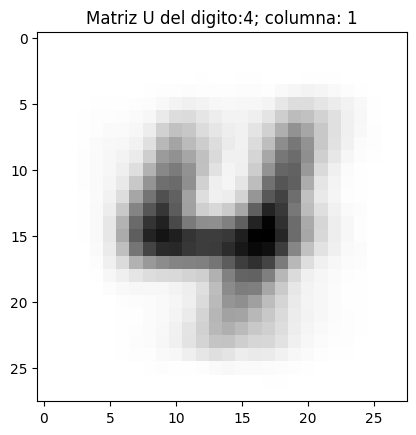

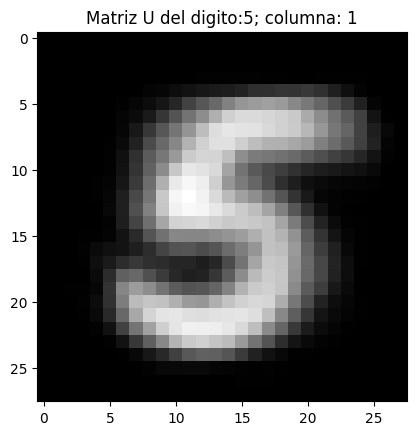

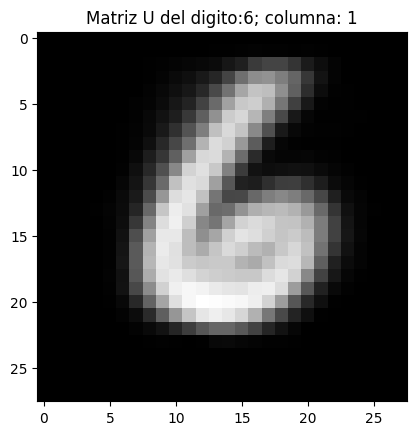

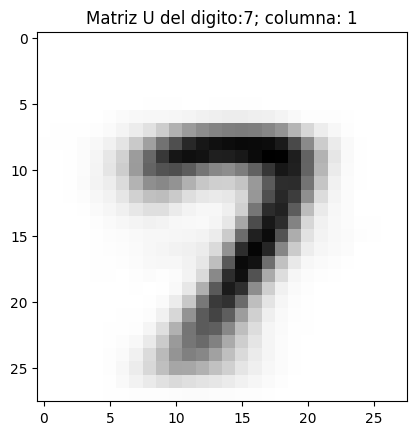

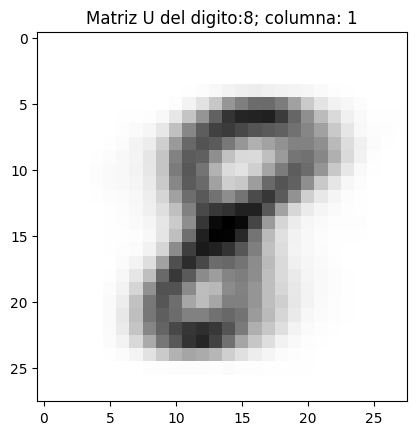

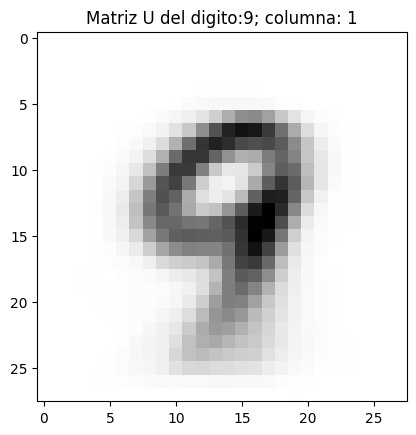

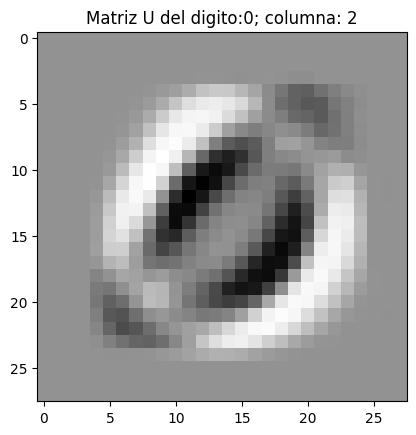

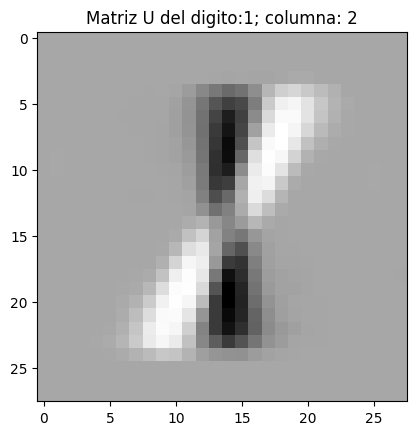

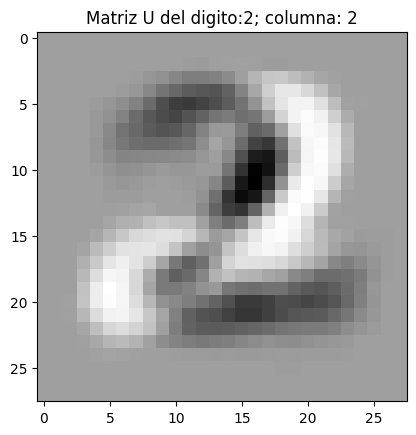

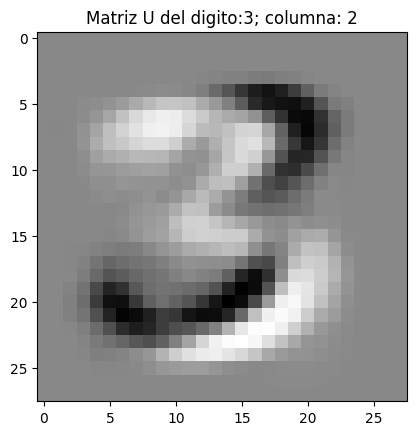

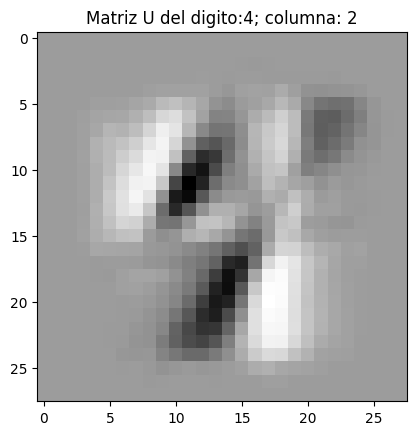

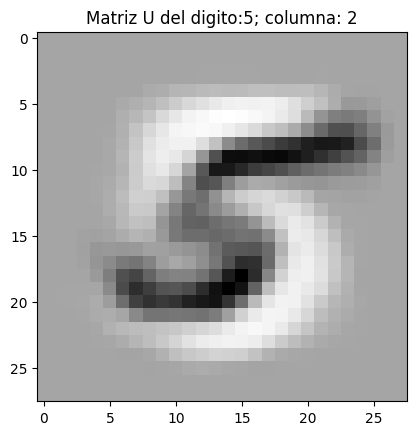

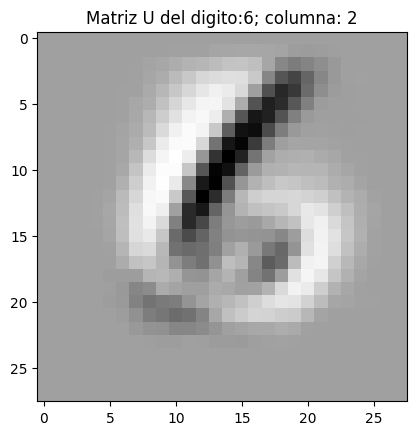

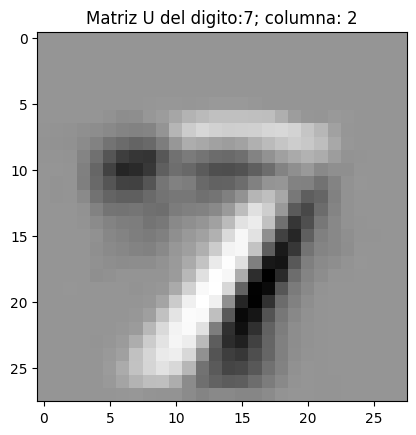

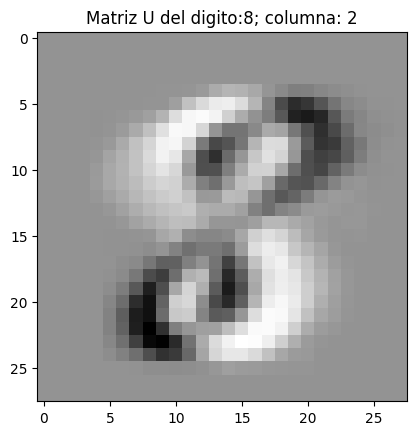

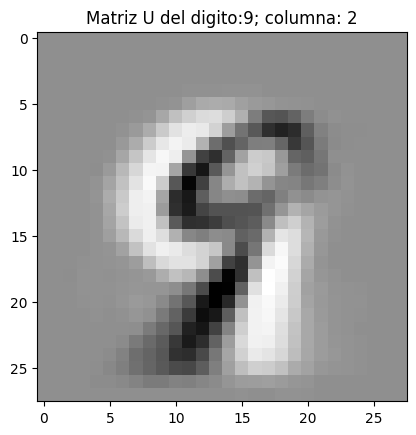

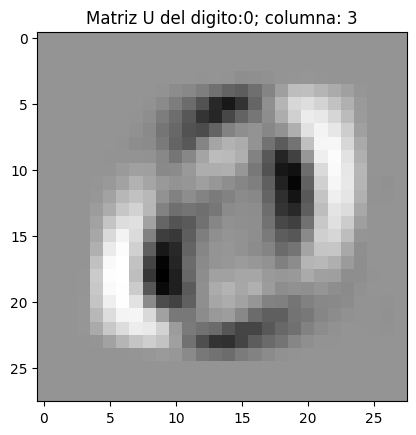

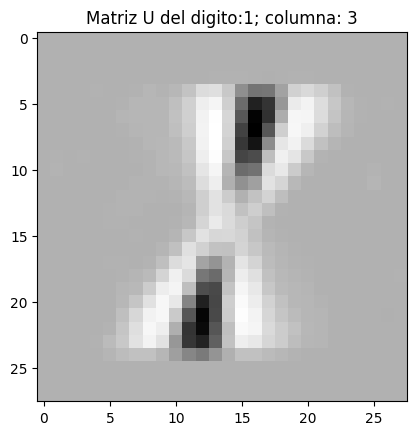

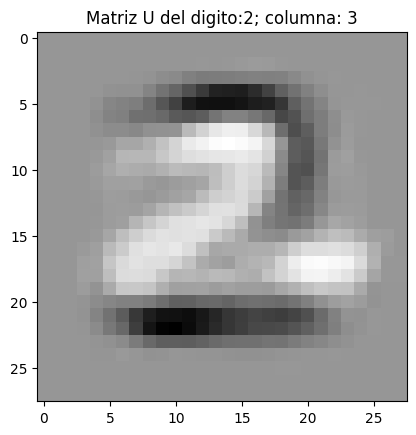

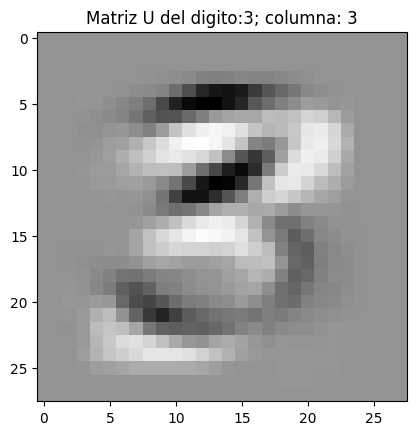

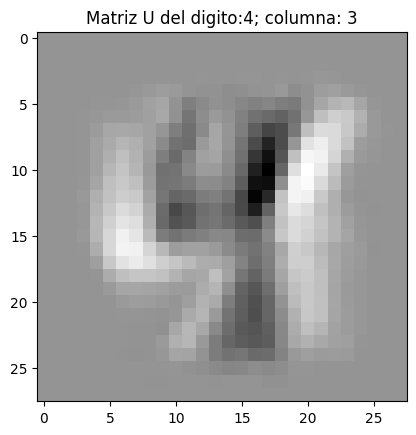

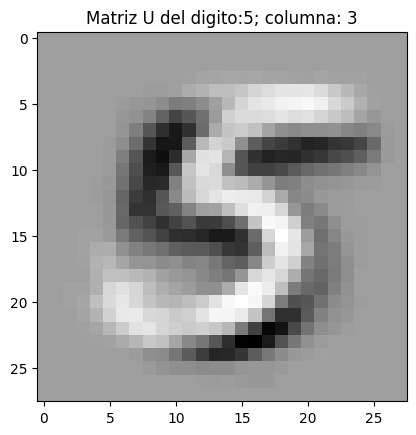

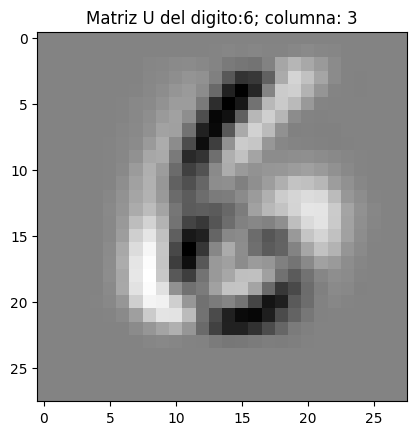

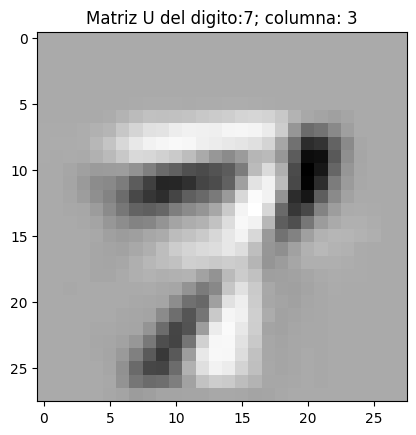

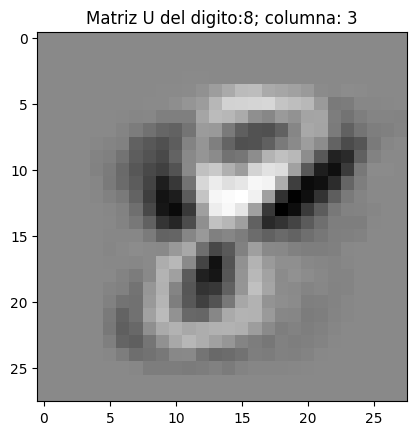

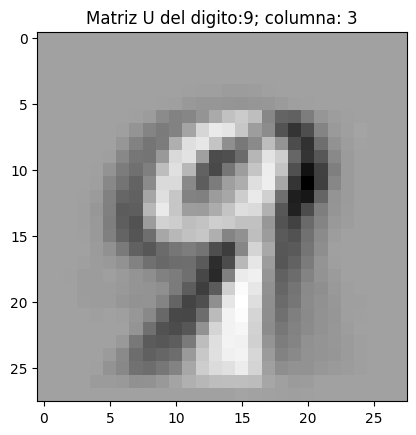

In [27]:
t = clasificacionDeMatrices(train)
listas = descomposicionDeMatrices(t)[0]

#inciso c
graf_col(listas,1)
#inciso D
graf_col(listas,2)
graf_col(listas,3)

##### C) Se puede observar que cuando logramos realizar la descomposición SVD de cada Mi en la primera columna de cada Ui encontramos el promedio o algo muy próximo a este. Esto lo podemos decir ya que los gráficos obtenidos de la descomposición son muy similares a los que se obtuvo cuando se busco y gráfico la imagen promedio.

##### D) Cuando se ven tanto la segunda como la tercera columna puede apreciarse una sutil diferencia en la forma del dígito y ya una diferencia más notoria en los colores que tiene el mismo. Un ejemplo podría ser el 0, donde en la primera columna se puede apreciar cual seria la forma y el color promedio que más posee este dígito, en la segunda tanto el fondo como el dígito tiene un gran cambio en el color pero todavía este se puede distinguir, y en la tercera el dígito estaría muy difuminado al punto de casi ser parte del fondo, pero sigue pudiendo ser distinguible.  

##### Por lo que podríamos decir que estas columnas representarian la intensidad por los píxeles que el dígito ocupa con más frecuencia. Por lo que si un dígito ocupa más veces un mismo píxel, por ejemplo el (15,15) el color que represente a este píxel será mucho más fuerte que otros pixeles.

##### Y no solo esto, sino que si recordamos cómo se arma la descomposición SVD, siendo que en la matriz Delta la diagonal posee los valores singulares de la matriz que son > 0 y están ordenados de manera creciente, podemos decir que las columnas de la matriz U que están asociados a un mayor valor singulares nos permiten tener una distinción mucho mayor del dígito. Por esto último podemos afirmar que el promedio va estar estrechamente relacionado con el valor singular más grande.

### Inciso E

In [28]:
def proyeccion_ortogonal(U, k, x):
    subMat = U[:, 0:k]
    if len(subMat.shape) == 1:
        Umono = subMat.reshape((len(U), 1))
    else:
        Umono = subMat
    proyeccion = Umono @ Umono.T
    return proyeccion

In [29]:
def residuo(l, k, x):
    posDelMinR = 0
    U = l[0]
    proyeccionOrtU = proyeccion_ortogonal(U, k, x)
    residuo = x - np.dot(proyeccionOrtU, x)
    residuoMin = residuo
    normResMin = np.linalg.norm(residuoMin)

    for i in range(len(l)):
        U = l[i]
        proyeccionOrtU = proyeccion_ortogonal(U, k, x)
        residuo = x - proyeccionOrtU @ x
        normRes = np.linalg.norm(residuo)

        if normResMin > normRes:
            posDelMinR = i
            normResMin = normRes
            residuoMin = residuo

    return (posDelMinR,residuoMin)

In [30]:
def PrecisionesTotales(l, m,k):
    casosTotales = len(m)
    precision = 0
    casosNoAcertados = []
    
    for i in range(len(m)):
        x = m[i]
        dig = x[0]
        x_1 = x[1:]
        x_2 = np.reshape(x_1,(x_1.shape[0],1))
        pos = residuo(l,k,x_2)[0]
        if pos == dig:
            precision = precision + 1 
        else : 
            casosNoAcertados.append(i)
    precisionTotal = precision/casosTotales
    return precisionTotal, casosNoAcertados

In [31]:
K1 = PrecisionesTotales(listas,primeros200,1)
K2 = PrecisionesTotales(listas,primeros200,2)
K3 = PrecisionesTotales(listas,primeros200,3)
K4 = PrecisionesTotales(listas,primeros200,4)
K5 = PrecisionesTotales(listas,primeros200,5)
Ks = [K1,K2,K3,K4,K5]

In [32]:
for i in range(len(Ks)):
    print('Precision con k = ' + str(i+1) + ': ' + str(Ks[i][0]) + '\n')


Precision con k = 1: 0.77

Precision con k = 2: 0.87

Precision con k = 3: 0.925

Precision con k = 4: 0.94

Precision con k = 5: 0.945



##### Podemos ver que mientras más columnas tengamos en cuenta la predicción es mucho mejor o más fiable. Lo cual esto nos confirma algo que veníamos sospechando desde el punto 3, que las columnas que agarramos para predecir 'conservan' la información que puede poseer el dígito, tanto el color, como la forma y la posición. 

#### AGREGADO: 

##### Y no solo esto, sino que cuando usamos más columnas esto quiere decir que aumenta el rango, por lo tanto podemos decir que ante un mayor rango la prediccion va a ser mucho mas fiable. 

# Punto 5:

##### Viendo los resultados tanto del punto 2 como del punto 4 podemos ver que la descomposición SVD es mucho más efectiva a la hora de predecir el resultado, y esto puede deberse a que justamente con la descomposición conservamos la 'información' sobre el digito y esto nos aporta una mayor precisión a la hora de predecir.

##### Ahora vamos a ver algunos casos donde las precisiones fallaron y analicemos las posibles causas.

##### Obtenemos los índices de la matriz de testeo (solamente de los primeros 200) y vemos si alguno se repite en diversos k, a partir de esto graficamos las 6 imagenes y vemos sus diferencias

In [33]:
for i in range(len(Ks)):
    print('Index no acertados con k = ' + str(i+1) + ': ' + str(Ks[i][1]) + '\n')

Index no acertados con k = 1: [7, 8, 10, 14, 15, 17, 21, 32, 37, 45, 52, 53, 54, 58, 62, 64, 65, 72, 76, 77, 79, 86, 91, 95, 96, 103, 110, 114, 115, 118, 120, 148, 150, 151, 158, 163, 168, 169, 171, 174, 183, 185, 188, 190, 194, 197]

Index no acertados con k = 2: [7, 23, 32, 45, 53, 54, 60, 64, 71, 72, 76, 79, 82, 96, 109, 110, 115, 118, 151, 158, 168, 169, 171, 174, 183, 197]

Index no acertados con k = 3: [3, 7, 32, 53, 62, 76, 79, 82, 83, 96, 110, 118, 151, 171, 192]

Index no acertados con k = 4: [3, 7, 17, 32, 43, 64, 72, 76, 79, 82, 83, 171]

Index no acertados con k = 5: [3, 7, 8, 26, 32, 72, 76, 79, 115, 171, 192]



#### Vamos a ver los casos de i=3, i=7 e  i=95

In [34]:
#obtenemos los casos que vamos a observar
i_3 = primeros200[3]
i_7 = primeros200[7]
i_95 = primeros200[95]

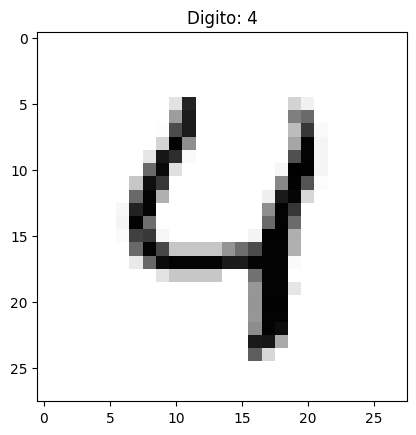

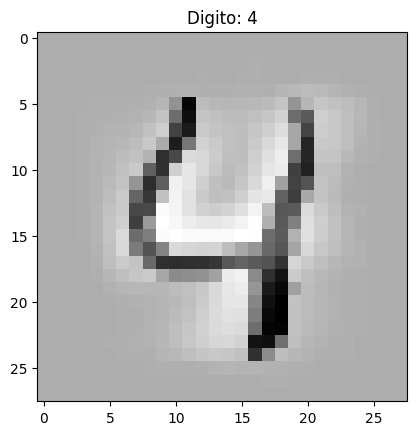

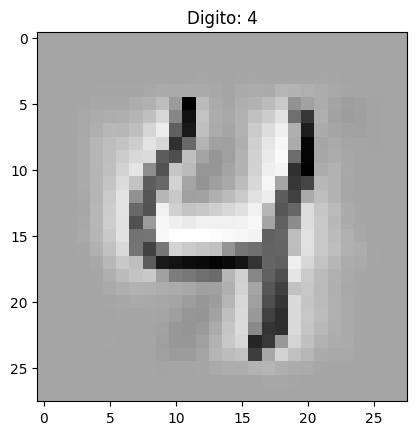

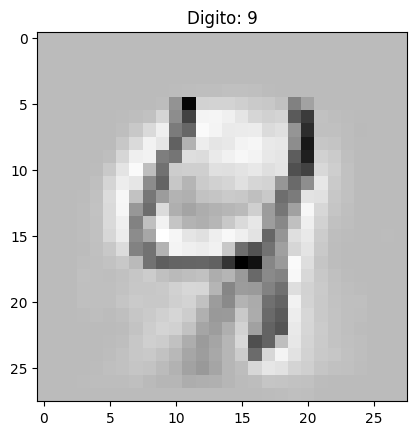

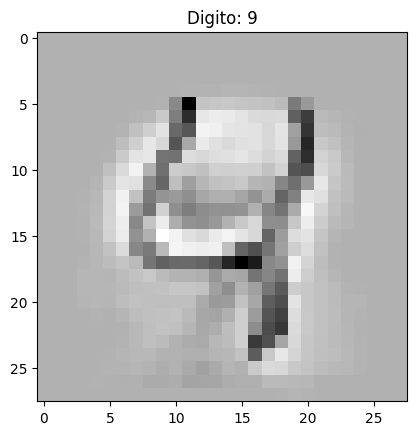

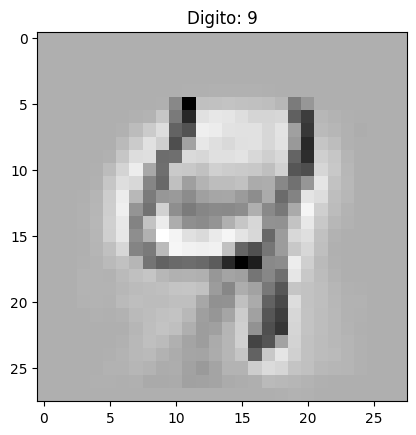

In [35]:
#comenzamos con el caso i = 3
graf_imagen(i_3[1:])
plt.title('Digito: ' + str(i_3[0]))
plt.show()
graf_imagen(residuo(listas,1,i_3[1:])[1])
plt.title('Digito: ' + str(residuo(listas,1,i_3[1:])[0]))
plt.show()
graf_imagen(residuo(listas,2,i_3[1:])[1])
plt.title('Digito: ' + str(residuo(listas,2,i_3[1:])[0]))
plt.show()
graf_imagen(residuo(listas,3,i_3[1:])[1])
plt.title('Digito: ' + str(residuo(listas,3,i_3[1:])[0]))
plt.show()
graf_imagen(residuo(listas,4,i_3[1:])[1])
plt.title('Digito: ' + str(residuo(listas,4,i_3[1:])[0]))
plt.show()
graf_imagen(residuo(listas,5,i_3[1:])[1])
plt.title('Digito: ' + str(residuo(listas,5,i_3[1:])[0]))
plt.show()

##### Como vemos en este caso, la precision empieza a empeorar y reconocer otro numero el cual no es. La precisión se mantiene 'fiel' hasta un maximo de 2 columnas seleccionadas. 

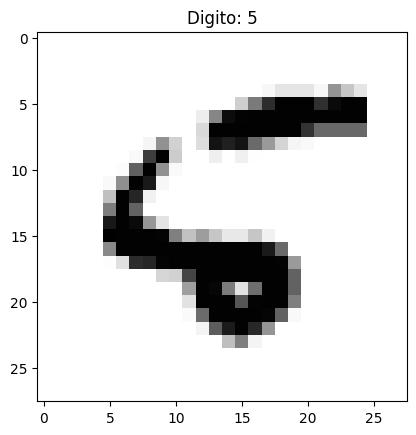

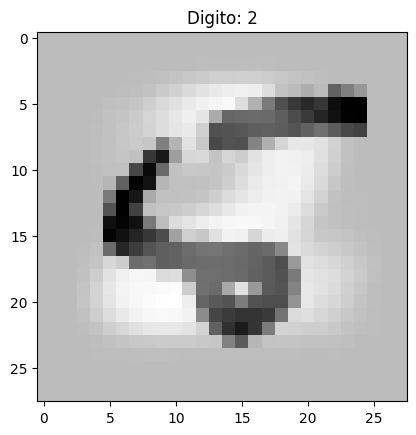

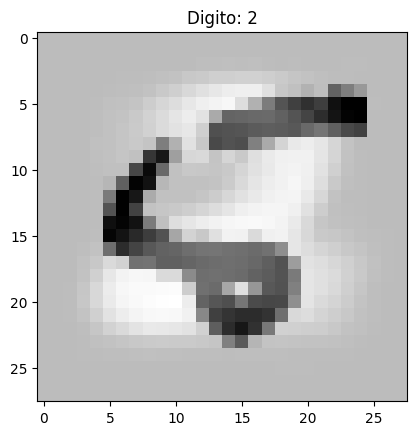

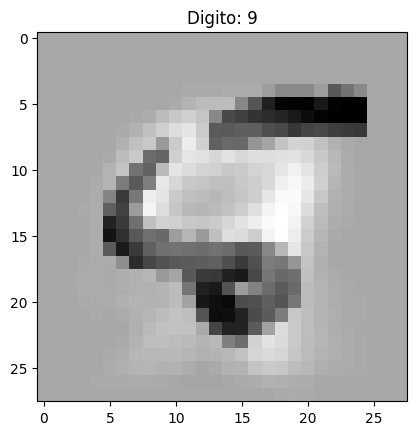

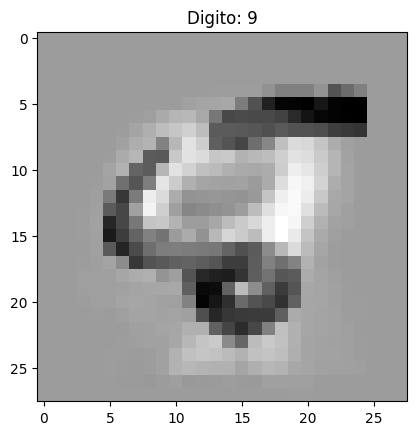

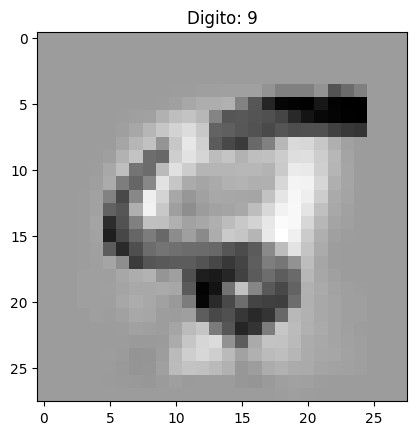

In [36]:
graf_imagen(i_7[1:])
plt.title('Digito: ' + str(i_7[0]))
plt.show()
graf_imagen(residuo(listas,1,i_7[1:])[1])
plt.title('Digito: ' + str(residuo(listas,1,i_7[1:])[0]))
plt.show()
graf_imagen(residuo(listas,2,i_7[1:])[1])
plt.title('Digito: ' + str(residuo(listas,2,i_7[1:])[0]))
plt.show()
graf_imagen(residuo(listas,3,i_7[1:])[1])
plt.title('Digito: ' + str(residuo(listas,3,i_7[1:])[0]))
plt.show()
graf_imagen(residuo(listas,4,i_7[1:])[1])
plt.title('Digito: ' + str(residuo(listas,4,i_7[1:])[0]))
plt.show()
graf_imagen(residuo(listas,5,i_7[1:])[1])
plt.title('Digito: ' + str(residuo(listas,5,i_7[1:])[0]))
plt.show()

##### Este caso ya es otro extremo, donde la descomposición no fue capaz de predecir desde un inicio que digito era, dando diferentes predicciones mientras más columnas se utilizaban. 

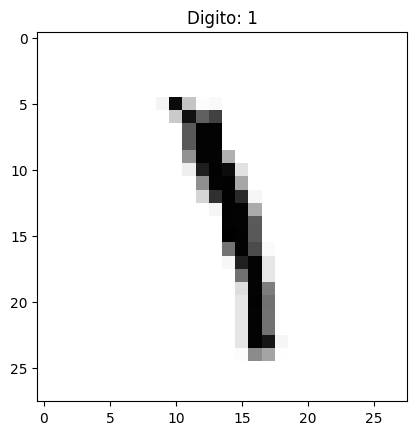

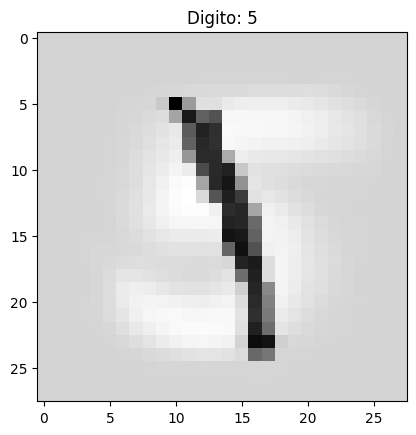

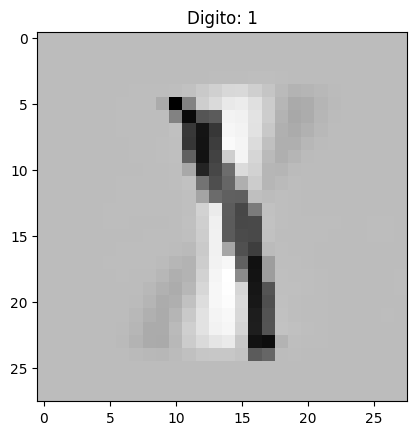

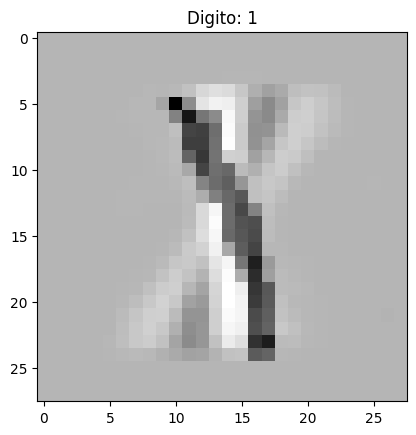

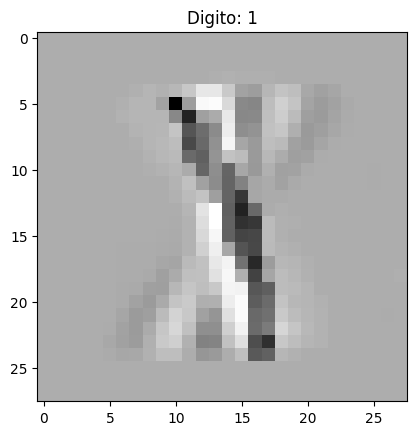

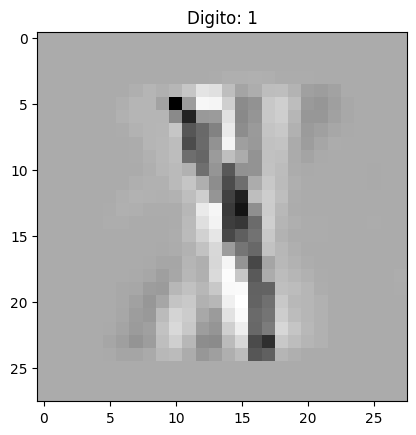

In [37]:
graf_imagen(i_95[1:])
plt.title('Digito: ' + str(i_95[0]))
plt.show()
graf_imagen(residuo(listas,1,i_95[1:])[1])
plt.title('Digito: ' + str(residuo(listas,1,i_95[1:])[0]))
plt.show()
graf_imagen(residuo(listas,2,i_95[1:])[1])
plt.title('Digito: ' + str(residuo(listas,2,i_95[1:])[0]))
plt.show()
graf_imagen(residuo(listas,3,i_95[1:])[1])
plt.title('Digito: ' + str(residuo(listas,3,i_95[1:])[0]))
plt.show()
graf_imagen(residuo(listas,4,i_95[1:])[1])
plt.title('Digito: ' + str(residuo(listas,4,i_95[1:])[0]))
plt.show()
graf_imagen(residuo(listas,5,i_95[1:])[1])
plt.title('Digito: ' + str(residuo(listas,5,i_95[1:])[0]))
plt.show()

##### Y este es un caso mucho mejor que los demas, que seguia la logica que buscamos, que era que mientras mas columnas teniamos en cuenta más precision ibamos a tener, lo cual se refleja perfectamente, ya que cuando tenemos una sola columna no predice correctamente pero cuando tenemos mas de una se predice correctamente. 